In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf

In [2]:
Dataset=pd.read_csv("winequality-red.csv")

In [3]:
Dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


###  we can use this for classification problem by changing like this

In [4]:

Dataset['QualityCat']=['good' if Dataset.iloc[i,11] >6.5 else 'bad' for i in Dataset.index]

In [5]:
Dataset.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,QualityCat
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,bad
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,bad
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,good
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,good
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,bad


### consider Regression

In [65]:
NDataset=Dataset.drop(columns=['QualityCat'],axis=1)

In [6]:
X=Dataset.iloc[:,:-2]
Y=Dataset[['quality']]

In [7]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [8]:
Y

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


### EDA & Feature Engineering

In [9]:
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


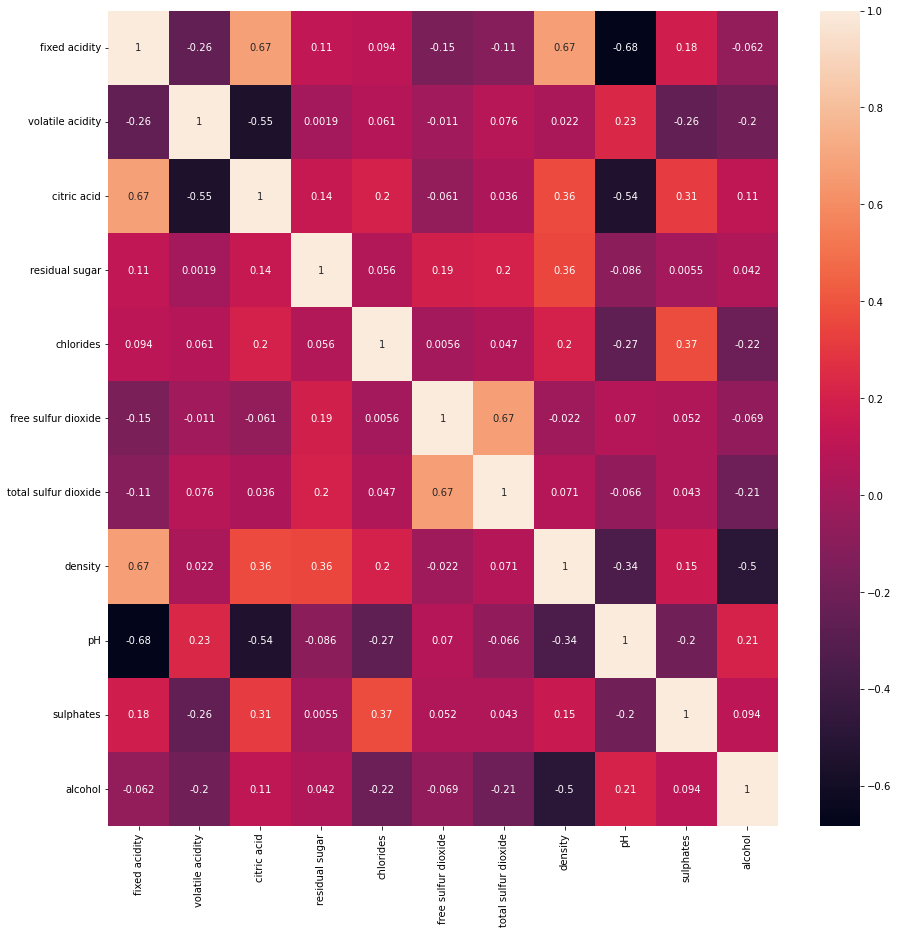

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(),annot=True)
plt.show()

In [73]:

def plotBoxplot(dataF):
    fig,axs=plt.subplots(3,4,figsize=(35,10))
    i=0
    for col in dataF.columns:
        sns.boxplot(dataF[col],ax=axs[int(i/4),i%4])
        i+=1
    plt.show()

C:\Users\keert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\keert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\keert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\keert\anaconda3\lib\si

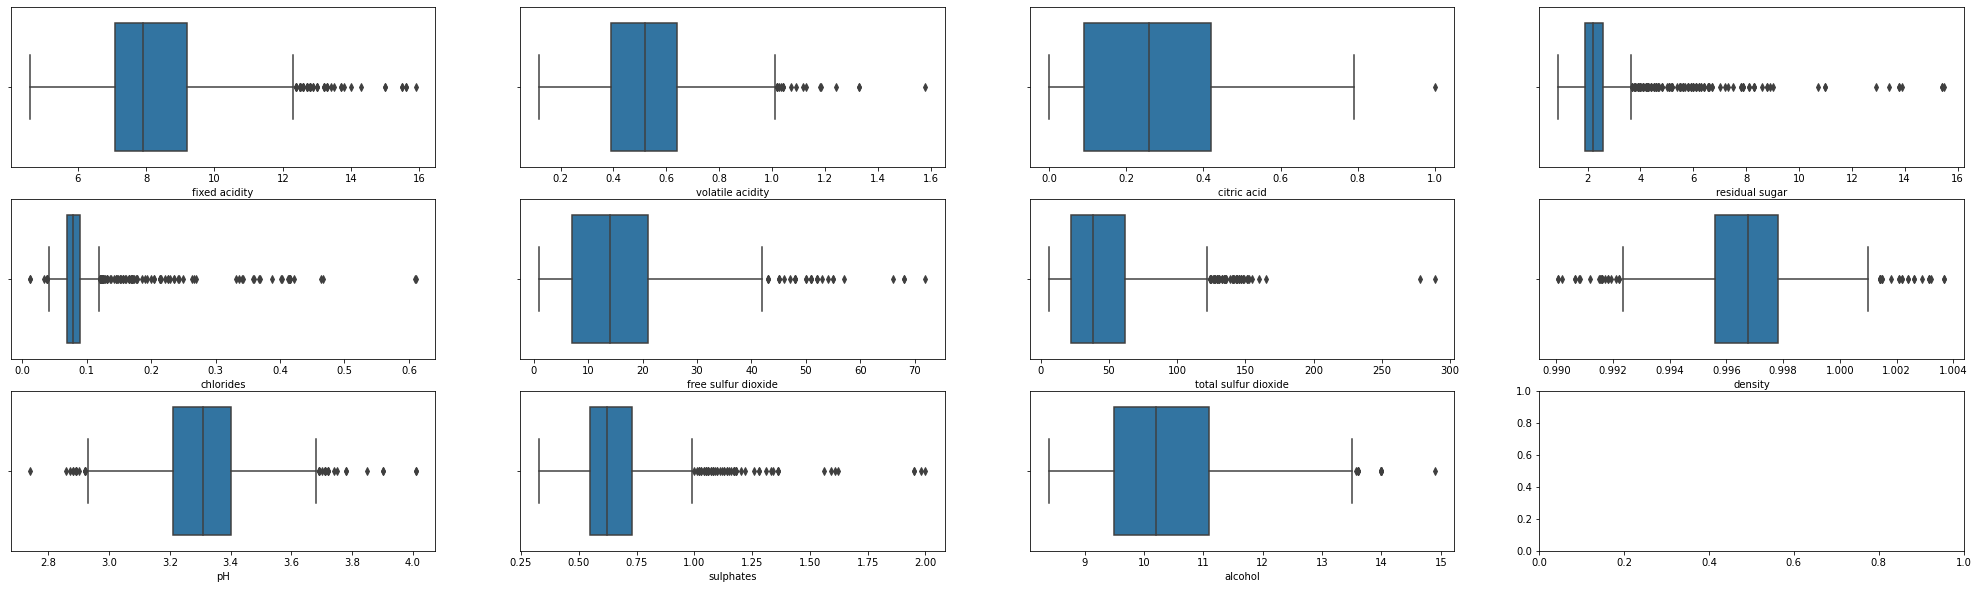

In [74]:
plotBoxplot(X.copy())

In [12]:
X.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


In [40]:
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [77]:
def FixOutlier(dataFrame):
    for col in dataFrame.columns:
        upperRange=dataFrame[col].mean()+2*dataFrame[col].std()
        lowerRange=dataFrame[col].mean()-2*dataFrame[col].std()
        for i in dataFrame[col].index:
            if (dataFrame[col][i]>upperRange):
                dataFrame[col][i]=upperRange
            elif (dataFrame[col][i]<lowerRange):
                dataFrame[col][i]=lowerRange
    return dataFrame
            

In [78]:
ExpData=FixOutlier(NDataset.copy())

C:\Users\keert\AppData\Local\Temp/ipykernel_14976/483852932.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame[col][i]=lowerRange
C:\Users\keert\AppData\Local\Temp/ipykernel_14976/483852932.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame[col][i]=upperRange


In [79]:
ExpData.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.269992,0.523797,0.269700,2.434678,0.083685,15.534075,45.290604,0.996744,3.310192,0.649726,10.400054,5.631019
std,1.606401,0.167146,0.191835,0.907870,0.025532,9.460057,29.359413,0.001745,0.144396,0.136819,1.007757,0.763818
min,4.837445,0.169701,0.000000,0.900000,0.012000,1.000000,6.000000,0.992972,3.002340,0.330000,8.400000,4.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,11.801830,0.885940,0.660578,5.358662,0.181597,36.795236,112.258441,1.000521,3.619886,0.997163,12.554318,7.000000


C:\Users\keert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\keert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\keert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\keert\anaconda3\lib\si

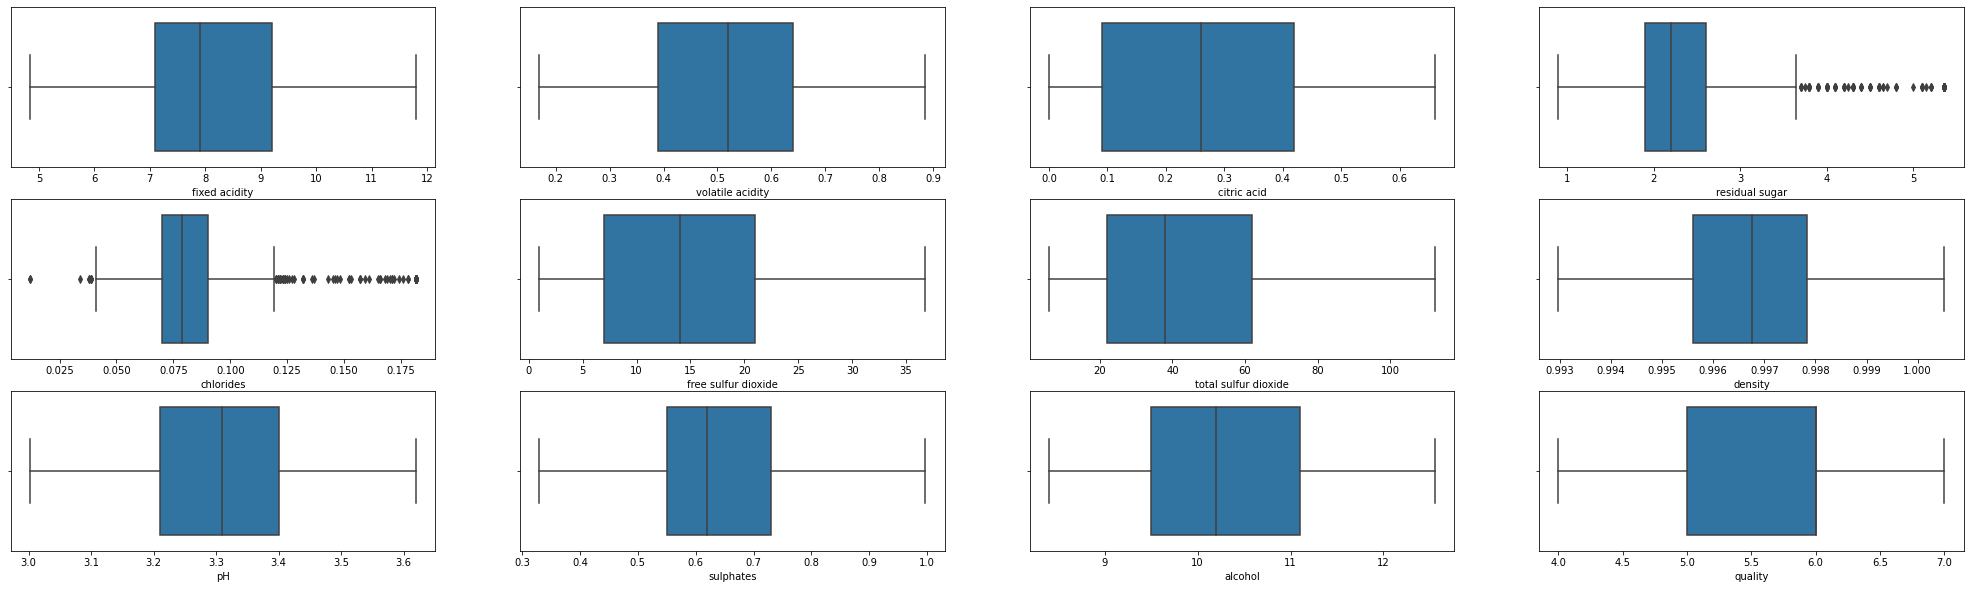

In [80]:
plotBoxplot(ExpData.copy())

C:\Users\keert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


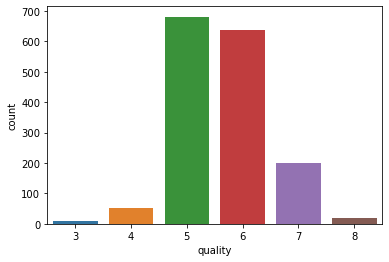

In [16]:
sns.countplot(Y['quality'])
plt.show()

In [81]:
X=ExpData.copy()

In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=0.2)

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
sc=StandardScaler()

In [85]:
X_train=sc.fit_transform(X_train)

In [86]:
X_test=sc.fit_transform(X_test)

### Build Neural network

In [191]:
Ann=tf.keras.models.Sequential([
    tf.keras.layers.Dense(128,activation='relu',kernel_initializer='he_uniform',input_shape=X_train[0].shape),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64,activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(1,activation='linear'),
])

In [196]:
Ann.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),loss='mean_squared_error',metrics=['mse','mae'])

In [197]:
Ann.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 128)               1664      
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_40 (Dense)            (None, 64)                8256      
                                                                 
 dense_41 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9,985
Trainable params: 9,985
Non-trainable params: 0
_________________________________________________________________


In [198]:
modelHistory=Ann.fit(X_train,Y_train,validation_split=0.2,epochs=70,callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/70
32/32 [==============================] - 1s 15ms/step - loss: 0.0619 - mse: 0.0619 - mae: 0.1764 - val_loss: 0.0202 - val_mse: 0.0202 - val_mae: 0.1032
Epoch 2/70
32/32 [==============================] - 0s 6ms/step - loss: 0.0643 - mse: 0.0643 - mae: 0.1768 - val_loss: 0.0203 - val_mse: 0.0203 - val_mae: 0.1035
Epoch 3/70
32/32 [==============================] - 0s 6ms/step - loss: 0.0651 - mse: 0.0651 - mae: 0.1759 - val_loss: 0.0203 - val_mse: 0.0203 - val_mae: 0.1030
Epoch 4/70
32/32 [==============================] - 0s 6ms/step - loss: 0.0555 - mse: 0.0555 - mae: 0.1636 - val_loss: 0.0190 - val_mse: 0.0190 - val_mae: 0.0976
Epoch 5/70
32/32 [==============================] - 0s 5ms/step - loss: 0.0597 - mse: 0.0597 - mae: 0.1723 - val_loss: 0.0192 - val_mse: 0.0192 - val_mae: 0.0992
Epoch 6/70
32/32 [==============================] - 0s 6ms/step - loss: 0.0617 - mse: 0.0617 - mae: 0.1723 - val_loss: 0.0189 - val_mse: 0.0189 - val_mae: 0.0983
Epoch 7/70
32/32 [=========

In [199]:
Ann.evaluate(X_test,Y_test)

10/10 [==============================] - 0s 4ms/step - loss: 0.0369 - mse: 0.0369 - mae: 0.1108


[0.036948688328266144, 0.036948688328266144, 0.11083152145147324]

In [200]:
pred=Ann.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [201]:
np.concatenate((Ann.predict(X_test),Y_test),axis=1)

10/10 [==============================] - 0s 3ms/step


array([[5.86903954, 6.        ],
       [4.55312586, 5.        ],
       [7.25159597, 7.        ],
       [6.09275055, 6.        ],
       [4.969203  , 5.        ],
       [5.9775548 , 6.        ],
       [5.08487082, 5.        ],
       [5.86037731, 6.        ],
       [3.65297842, 4.        ],
       [5.05593538, 5.        ],
       [5.07328081, 5.        ],
       [4.86009598, 5.        ],
       [6.00158024, 6.        ],
       [5.04007387, 5.        ],
       [6.09056139, 6.        ],
       [5.96098948, 6.        ],
       [7.23094368, 7.        ],
       [5.06638527, 5.        ],
       [5.0445652 , 5.        ],
       [3.50866675, 4.        ],
       [7.18654728, 7.        ],
       [5.94511557, 6.        ],
       [6.012393  , 6.        ],
       [4.51285505, 4.        ],
       [6.03290081, 6.        ],
       [4.9673357 , 5.        ],
       [4.98645735, 5.        ],
       [7.25819397, 7.        ],
       [4.97154617, 5.        ],
       [6.11040211, 6.        ],
       [5.

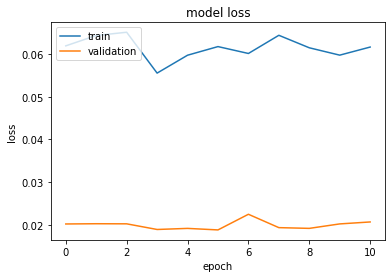

In [202]:
plt.plot(modelHistory.history['loss'])
plt.plot(modelHistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

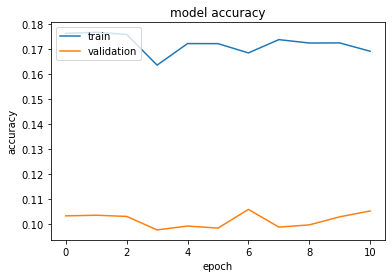

In [203]:
plt.plot(modelHistory.history['mae'])
plt.plot(modelHistory.history['val_mae'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [204]:
from sklearn.metrics import r2_score
r2_score(Y_test,pred)

0.9354564054108329

### Machine Learning Model

In [205]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [206]:
MLmodelCollection={'LinearRegression':LinearRegression(),'SVM':SVR(),'RandomForest':RandomForestRegressor()}

In [207]:
for eachmodelName,eachemodel in MLmodelCollection.items():
    eachemodel.fit(X_train,Y_train)
    print("i am "+eachmodelName)
    print("....Predicting....")
    pred=eachemodel.predict(X_test)
    print("SCORE is ",r2_score(Y_test,pred))
    print("\n\n")

i am LinearRegression
....Predicting....
SCORE is  0.9629982699299735



i am SVM
....Predicting....
SCORE is  0.9194439329317567





C:\Users\keert\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\keert\AppData\Local\Temp/ipykernel_14976/1331231360.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  eachemodel.fit(X_train,Y_train)


i am RandomForest
....Predicting....
SCORE is  0.9712464005458887





In [208]:
from sklearn.model_selection import GridSearchCV

In [102]:
param={
 'max_depth': [ 40, 50, 90, 100],

 'min_samples_split': [2, 5, 10],
 'n_estimators': [50,100,200, 400]}

In [103]:
gridRandom=GridSearchCV(RandomForestRegressor(),param_grid=param,cv=3)

In [105]:
gridRandom.fit(X_train,Y_train)

C:\Users\keert\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\keert\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\keert\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\keert\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y wa

C:\Users\keert\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\keert\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\keert\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\keert\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y wa

C:\Users\keert\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\keert\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\keert\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\keert\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y wa

C:\Users\keert\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\keert\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\keert\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\keert\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y wa

C:\Users\keert\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\keert\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\keert\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\keert\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y wa

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [40, 50, 90, 100],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 400]})

In [106]:
gridRandom.best_score_

0.973173402014358

In [107]:
gridRandom.best_params_

{'max_depth': 50, 'min_samples_split': 2, 'n_estimators': 50}

In [117]:
gridRandom.predict(X_test[0].reshape(1,-1))

array([6.])

In [108]:
r2_score(Y_test,gridRandom.predict(X_test))

0.9711901740020471